# tutorial 1. Simulation of a projectile on EARTH.

We want to know the dynamics of a green apple (m=0.3 kg) tossed horizontally at 10 cm/s speed from the top of the Toronto CN Tower (553 m) for the first 10 seconds.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

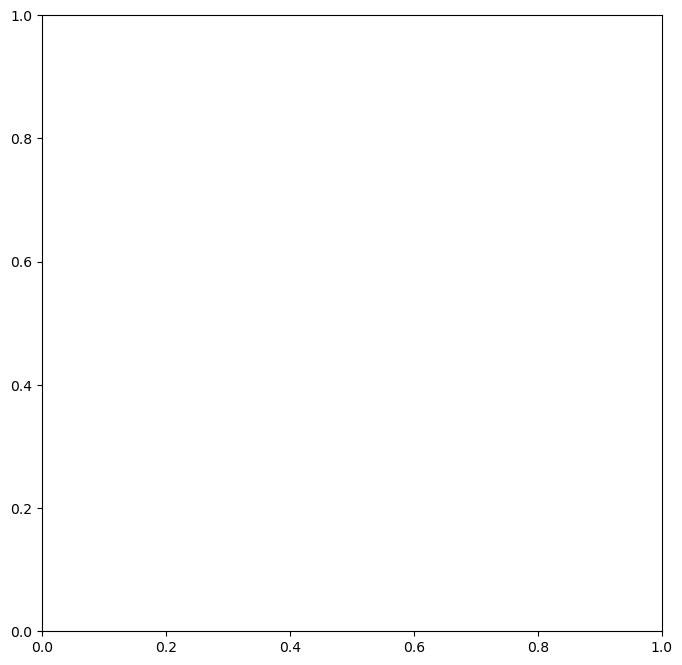

In [4]:
# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8,8))

In [5]:
# Adjust axes limits according to your problem. Here we don't need more than a couple of meters left or right, and 600 meters up
ax.set(xlim=(-2,2), ylim=(0,600), xlabel="Position, meters", ylabel="Height, meters", title= "Apple falling from CN tower")

[(-2.0, 2.0),
 (0.0, 600.0),
 Text(0.5, 4.444444444444452, 'Position, meters'),
 Text(4.444444444444445, 0.5, 'Height, meters'),
 Text(0.5, 1.0, 'Apple falling from CN tower')]

In [6]:
# parameters of the problem
T = 10. #2
m = 0.3 #kg
g = 9.8 #m/s**2
v0x = -0.1 #m/s
H = 553. #m

In [7]:
# setting a timestep to be 550 ms
dt = 0.05 # s
N = int(T/dt)

In [8]:
# Allcating arrays for 2D problem
v = np.zeros((N+1, 2))
r = np.zeros((N+1, 2))
f = np.zeros((N+1, 2))

In [9]:
# initial conditions
r[0] = np.array([0., H])
v[0] = np.array([-v0x, 0.])

In [10]:
# the only force is gravity
f[:] = np.array([0., -m*g])

In [11]:
# Run dynamics
for n in range(N):
    v[n+1] = v[n] + f[n]/m*dt
    r[n+1] = r[n] + v[n+1]*dt

In [12]:
# drawing the first data point
scat = ax.scatter(r[0,0], r[0,1], marker="o", c="g", s=200)

In [13]:
# animating
def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, func=animate, frames=N)
# This function will create a lot of *.png files in a folder "CNtower_frames"
# and create an HTML page with a simulation
ani.save("CNtower.html", writer=animation.HTMLWriter(fps=1//dt))
plt.close()
#ani.save("CNtower.mp4", fps=1//dt)

Let's visualize the dynamics using embedded HTML. It's interactive and you can play a movie step by step

In [15]:
from IPython.display import HTML
HTML("CNtower.html")